In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.cm as cm

In [2]:
gam_lang = pd.read_json('../file/gambling_language.json')
gam_type_sen = pd.read_json('../file/gambling_type_sentiment.json', orient='records')
mas_cnt = pd.read_json('../file/mastodon_count.json')
mas_gam_lang = pd.read_json('../file/mastodon_gambling_language.json')
lang_code = pd.read_csv('../file/iso_639_1_code.csv')

In [3]:
df_gam_type_sen = pd.json_normalize(gam_type_sen['rows'])
df_gam_type_sen['avg sentiment'] = df_gam_type_sen['value.totalSentiment']/df_gam_type_sen['value.count']
df_gam_type_sen = df_gam_type_sen.rename(columns={'key': 'type'})

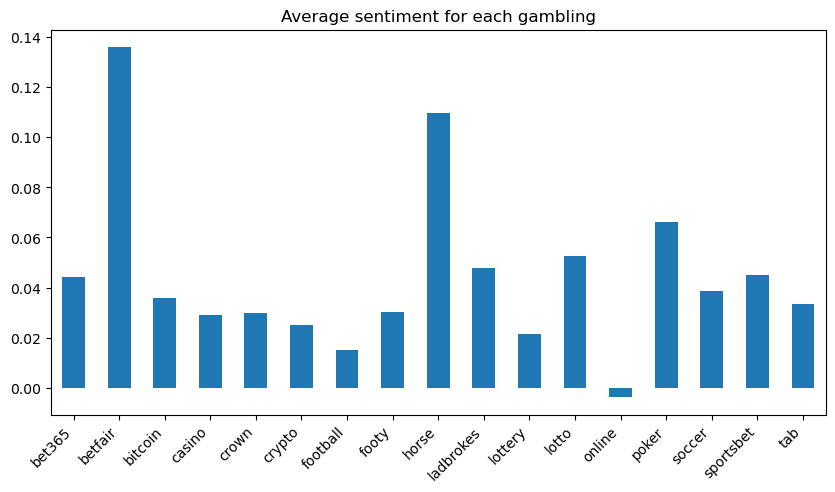

In [4]:
ax = df_gam_type_sen.plot.bar(x='type', y='avg sentiment', rot=0, figsize=(10, 5))
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')
plt.title('Average sentiment for each gambling')
ax.get_legend().remove()
plt.xlabel('')
plt.show()

C:\Users\wcps0\AppData\Local\Temp\ipykernel_27824\2360279122.py:2: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = cm.get_cmap('tab20')


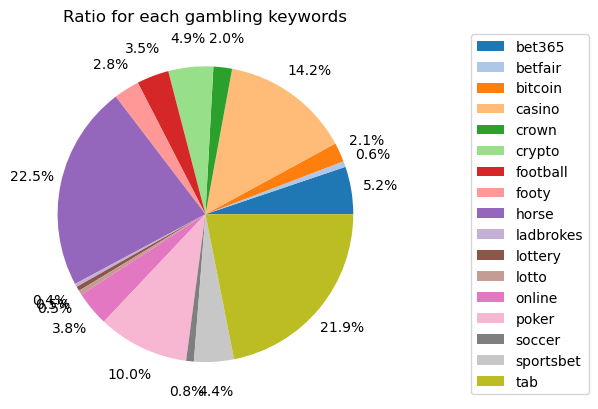

In [5]:
#df.plot.pie(y='type', labels=df['value.count'], autopct='%1.1f%%')
cmap = cm.get_cmap('tab20')
ax = df_gam_type_sen.plot.pie(y='value.count', labels=[''] * len(df_gam_type_sen['value.count']), autopct='%1.1f%%', pctdistance=1.2, colors=cmap(range(len(df_gam_type_sen['value.count']))))
#ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')

plt.legend(df_gam_type_sen['type'], loc='center left', bbox_to_anchor=(1.2, 0.5))
plt.title('Ratio for each gambling keywords')
plt.ylabel('')
plt.xlabel('')
plt.show()

In [6]:
gam_list = ['lottery', 'lotto', 'poker']
df_gam = df_gam_type_sen[df_gam_type_sen['type'].isin(gam_list)]
df_gam

type  value.count  value.totalSentiment  avg sentiment
10  lottery            7              0.149282       0.021326
11    lotto            7              0.367327       0.052475
13    poker          142              9.409969       0.066267

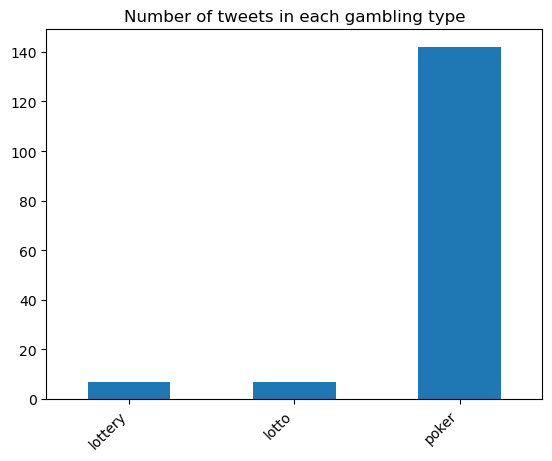

In [7]:
ax = df_gam.plot.bar(x='type', y='value.count', rot=0)
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')
ax.get_legend().remove()
plt.title('Number of tweets in each gambling type')
plt.ylabel('')
plt.xlabel('')
plt.show()

In [8]:
sport_list = ['football', 'footy', 'soccer', 'horse']
df_sport = df_gam_type_sen[df_gam_type_sen['type'].isin(sport_list)]
df_sport

type  value.count  value.totalSentiment  avg sentiment
6   football           50              0.750262       0.015005
7      footy           40              1.204406       0.030110
8      horse          320             35.022095       0.109444
14    soccer           12              0.461647       0.038471

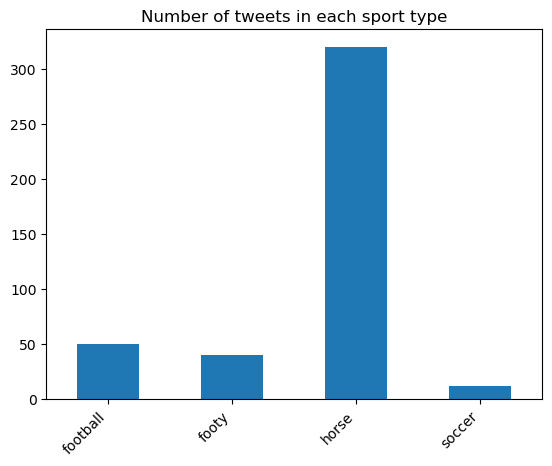

In [9]:
ax = df_sport.plot.bar(x='type', y='value.count', rot=0)
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')
ax.get_legend().remove()
plt.title('Number of tweets in each sport type')
plt.ylabel('')
plt.xlabel('')
plt.show()

In [10]:
crypto_list = ['crypto', 'NFT', 'bitcoin', 'Ethereum', 'Cryptocurrency','Altcoin','Stablecoin', 'Decentralized finance', 'Litecoin', 'Token coin', 'Binance','Altcoins','Tether']
df_crypto = df_gam_type_sen[df_gam_type_sen['type'].isin(crypto_list)]
df_crypto


type  value.count  value.totalSentiment  avg sentiment
2  bitcoin           30              1.081323       0.036044
5   crypto           70              1.767949       0.025256

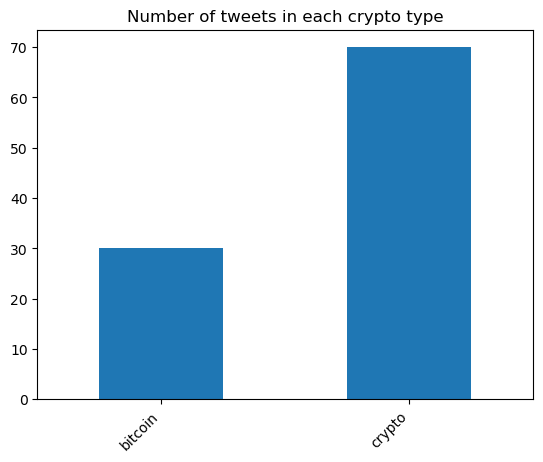

In [11]:
ax = df_crypto.plot.bar(x='type', y='value.count', rot=0)
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')
ax.get_legend().remove()
plt.title('Number of tweets in each crypto type')
plt.ylabel('')
plt.xlabel('')
plt.show()

In [12]:
gam_place_list = ['online', 'crown', 'sportsbet', 'tab', 'betfair', 'bet365', 'ladbrokes', 'Keno', 'casino', 'dog race', 'scratch tickets','Joe Fortune', 'Ignition', 'Red Dog', 'Aussie Play', 'Ricky Casino', 'Hellspin']
df_gam_place = df_gam_type_sen[df_gam_type_sen['type'].isin(gam_place_list)]
df_gam_place

type  value.count  value.totalSentiment  avg sentiment
0      bet365           74              3.263088       0.044096
1     betfair            9              1.223073       0.135897
3      casino          202              5.859030       0.029005
4       crown           29              0.861923       0.029721
9   ladbrokes            5              0.239277       0.047855
12     online           54             -0.197928      -0.003665
15  sportsbet           62              2.787788       0.044964
16        tab          312             10.403352       0.033344

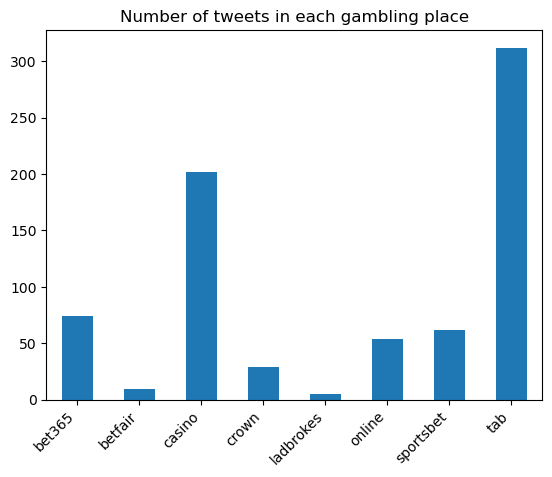

In [13]:
ax = df_gam_place.plot.bar(x='type', y='value.count', rot=0)
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')
ax.get_legend().remove()
plt.title('Number of tweets in each gambling place')
plt.ylabel('')
plt.xlabel('')
plt.show()

In [14]:
df_gam_lang = pd.json_normalize(gam_lang['rows'])
lang_code = lang_code.drop(['Native name (endonym)'],axis=1)
df_gam_lang_merg = pd.merge(df_gam_lang, lang_code, left_on='key', right_on='639-1 code')
df_gam_lang_merg = df_gam_lang_merg.drop(['key','639-1 code'], axis=1)

df_gam_lang_merg_sort = df_gam_lang_merg.sort_values(by='value', ascending=False)
top_values = df_gam_lang_merg_sort.head(10)
other_sum = df_gam_lang_merg_sort.iloc[10:]['value'].sum()
df_gam_lang_merg_sort_pie = pd.concat([top_values, pd.DataFrame({'ISO language name': ['Other'], 'value': [other_sum]})])

C:\Users\wcps0\AppData\Local\Temp\ipykernel_27824\3730598099.py:2: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = cm.get_cmap('tab20')


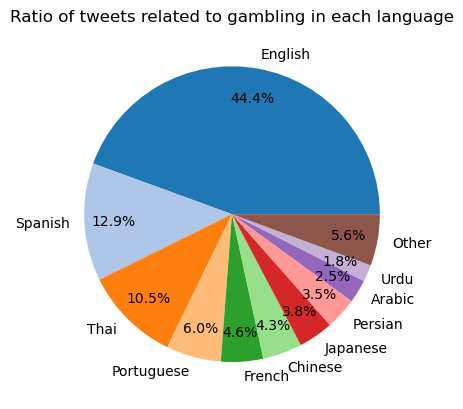

In [15]:
#ax = df_gam_lang_merg.plot.bar(x='ISO language name', y='value', rot=0, figsize=(10, 5))
cmap = cm.get_cmap('tab20')
ax = df_gam_lang_merg_sort_pie.plot.pie(y='value', labels=df_gam_lang_merg_sort_pie['ISO language name'], autopct='%1.1f%%', pctdistance=0.8, colors=cmap(range(len(df_gam_lang_merg_sort_pie['value']))))
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')
plt.title('Ratio of tweets related to gambling in each language')
ax.get_legend().remove()
plt.ylabel('')
plt.xlabel('')
plt.show()

In [16]:
df_gam_lang_merg

value ISO language name
0     388            Arabic
1       7           Catalan
2       2             Czech
3      36            German
4     111             Greek
5    6771           English
6    1962           Spanish
7       1            Basque
8     531           Persian
9      32           Finnish
10    702            French
11      2           Haitian
12      2         Hungarian
13      1         Icelandic
14     39           Italian
15    580          Japanese
16      6            Korean
17      1           Latvian
18    159            Nepali
19     46             Dutch
20      2         Norwegian
21     55           Panjabi
22    139            Polish
23    914        Portuguese
24    145           Russian
25      3            Sindhi
26     36           Swedish
27   1599              Thai
28      5           Tagalog
29      6           Turkish
30     21         Ukrainian
31    279              Urdu
32    657           Chinese

In [17]:
gam_area = pd.read_json('../file/gambling_area_vulgarity.json')

In [18]:
df_gam_area = pd.json_normalize(gam_area['rows'])
df_gam_area[['state','suburb']] = df_gam_area['key'].str.split(', ',expand=True)

In [19]:
df_gam_area

key  value.count  value.vulgarity  \
0            australian capital territory,            18                2   
1    australian capital territory, Canberra          412              102   
2                         new south wales,           124               23   
3              new south wales, Agnes Banks            1                0   
4                   new south wales, Albury           10                0   
..                                      ...          ...              ...   
378         western australia, Port Hedland            8                4   
379      western australia, Rottnest Island            1                0   
380            western australia, Sandstone            1                1   
381                   western australia, WA            1                0   
382        western australia, Yallabatharra            1                1   

                            state           suburb  
0    australian capital territory                   
1    australian capital territory         Canberra  
2                 new south wales                   
3                 new south wales      Agnes Banks  
4                 new south wales           Albury  
..                            ...              ...  
378             western australia     Port Hedland  
379             western australia  Rottnest Island  
380             western australia        Sandstone  
381             western australia               WA  
382             western australia    Yallabatharra  

[383 rows x 5 columns]

In [20]:
df_gam_area_state = df_gam_area.drop(['key', 'suburb', 'value.vulgarity'], axis=1)
df_gam_area_state

value.count                         state
0             18  australian capital territory
1            412  australian capital territory
2            124               new south wales
3              1               new south wales
4             10               new south wales
..           ...                           ...
378            8             western australia
379            1             western australia
380            1             western australia
381            1             western australia
382            1             western australia

[383 rows x 2 columns]

In [21]:
df_gam_area_state_g = df_gam_area_state.groupby('state').sum().reset_index()
df_gam_area_state_g = df_gam_area_state_g.sort_values(by='state')
df_gam_area_state_g

state  value.count
0  australian capital territory          430
1               new south wales         5073
2            northern territory           91
3                    queensland         2848
4               south australia          945
5                      tasmania          208
6                      victoria         4547
7             western australia         1130

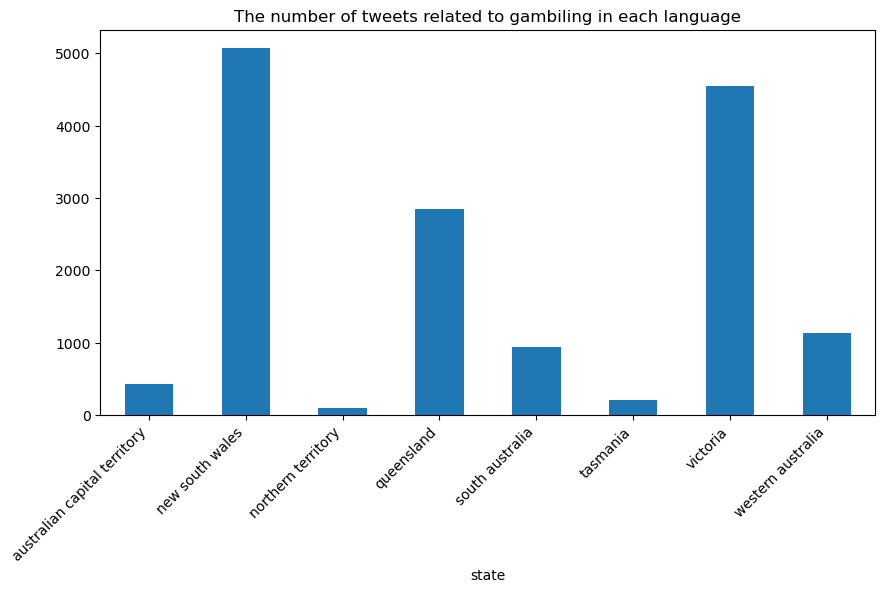

In [22]:
ax = df_gam_area_state_g.plot.bar(x='state', y='value.count', rot=0, figsize=(10, 5))
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')
ax.get_legend().remove()
plt.title('The number of tweets related to gambiling in each language')
plt.show()

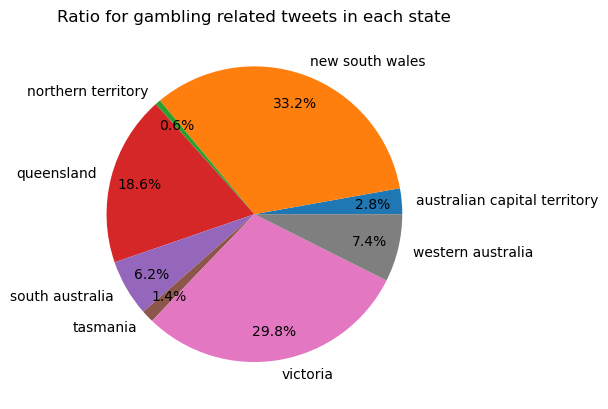

In [23]:
ax = df_gam_area_state_g.plot.pie(y='value.count', labels=df_gam_area_state_g['state'], autopct='%1.1f%%', pctdistance=0.8)
#ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')

plt.legend(df_gam_area_state_g['state'], loc='center left', bbox_to_anchor=(1.2, 0.5))
ax.get_legend().remove()
plt.title('Ratio for gambling related tweets in each state')
plt.ylabel('')
plt.xlabel('')
plt.show()

In [24]:
df_mas_gam_lang = pd.json_normalize(mas_gam_lang['rows'])
df_mas_gam_lang_merg = pd.merge(df_mas_gam_lang, lang_code, left_on='key', right_on='639-1 code')
df_mas_gam_lang_merg = df_mas_gam_lang_merg.drop(['key','639-1 code'], axis=1)
#df_mas_gam_lang_merg = df_mas_gam_lang_merg[df_mas_gam_lang_merg['value']>100]
df_mas_gam_lang_merg_sort = df_mas_gam_lang_merg.sort_values(by='value', ascending=False)
top_values = df_mas_gam_lang_merg_sort.head(5)
other_sum = df_mas_gam_lang_merg_sort.iloc[5:]['value'].sum()
df_mas_gam_lang_merg_pie = pd.concat([top_values, pd.DataFrame({'ISO language name': ['Other'], 'value': [other_sum]})])

In [25]:
df_mas_gam_lang_merg_pie

value ISO language name
19  721830           English
45   90408          Japanese
17   87858            German
95   36360           Chinese
28   29944            French
0   114260             Other

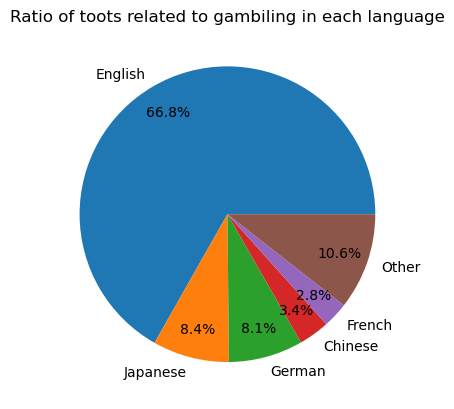

In [26]:
#ax = df_mas_gam_lang_merg.plot.bar(x='ISO language name', y='value', rot=0, figsize=(20, 5))
ax = df_mas_gam_lang_merg_pie.plot.pie(y='value', labels=df_mas_gam_lang_merg_pie['ISO language name'], autopct='%1.1f%%', pctdistance=0.8)
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')
plt.title('Ratio of toots related to gambiling in each language')
ax.get_legend().remove()
plt.ylabel('')
plt.xlabel('')
plt.show()

In [27]:
au_po = pd.read_excel('../file/Australian Bureau of Statistics.xlsx')
au_po = au_po.drop([8,9,10,11,12])
au_po = au_po.rename(columns={'Unnamed: 0': 'state', au_po.columns[1]: 'count'})
au_po = au_po.sort_values(by='state')
au_po


state   count  Change over previous year ('000)  \
7  Australian Capital Territory   459.0                               6.3   
0               New South Wales  8193.5                             108.7   
6            Northern Territory   250.6                               0.9   
2                    Queensland  5354.8                             114.4   
3               South Australia  1828.7                              25.2   
5                      Tasmania   571.9                               4.1   
1                      Victoria  6656.3                             108.4   
4             Western Australia  2805.0                              50.4   

   Change over previous year (%)  
7                            1.4  
0                            1.3  
6                            0.4  
2                            2.2  
3                            1.4  
5                            0.7  
1                            1.7  
4                            1.8

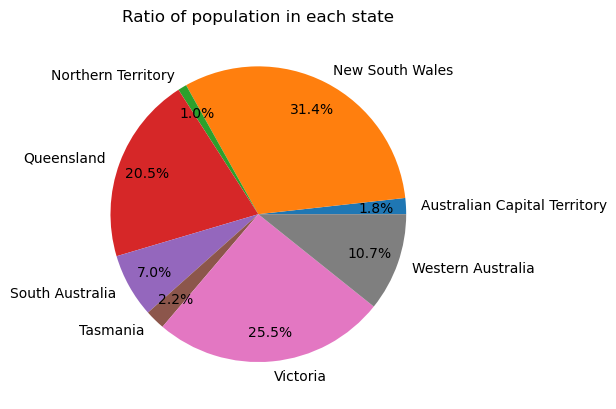

In [28]:
ax = au_po.plot.pie(y='count', labels=au_po['state'], autopct='%1.1f%%', pctdistance=0.8)
#ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')

plt.legend(au_po['state'], loc='center left', bbox_to_anchor=(1.2, 0.5))
ax.get_legend().remove()
plt.title('Ratio of population in each state')
plt.ylabel('')
plt.xlabel('')
plt.show()

In [29]:
mas_count = pd.read_json('../file/mastodon_count.json').drop('comments', axis=1)
mas_count = pd.json_normalize(mas_count['rows'])
mas_count[['gambling', 'vulgarity']] = mas_count['key'].apply(pd.Series)
mas_count = mas_count.drop('key',axis=1)
mas_count

value  gambling  vulgarity
0  1133853         0          0
1    70631         0          1
2    12255         1          0
3     5802         1          1

In [30]:
mas_count_gam = mas_count.groupby('gambling').sum().reset_index()
mas_count_vul = mas_count.groupby('vulgarity').sum().reset_index()
mas_count_vul

vulgarity    value  gambling
0          0  1146108         1
1          1    76433         1

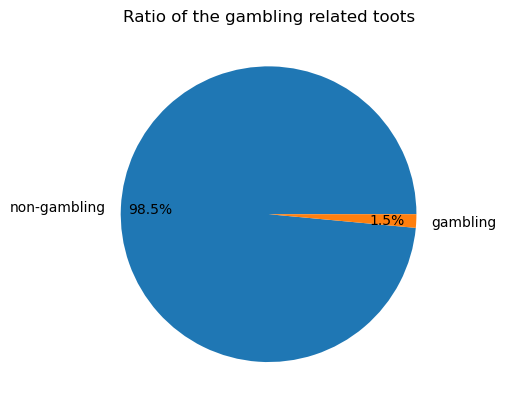

In [31]:
ax = mas_count_gam.plot.pie(y='value', labels=['non-gambling', 'gambling'], autopct='%1.1f%%', pctdistance=0.8)
ax.get_legend().remove()
plt.title('Ratio of the gambling related toots')
plt.ylabel('')
plt.xlabel('')
plt.show()

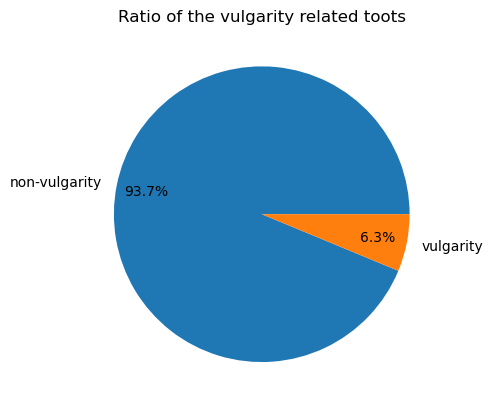

In [32]:
ax = mas_count_vul.plot.pie(y='value', labels=['non-vulgarity', 'vulgarity'], autopct='%1.1f%%', pctdistance=0.8)
ax.get_legend().remove()
plt.title('Ratio of the vulgarity related toots')
plt.ylabel('')
plt.xlabel('')
plt.show()

In [33]:
twt_count = pd.read_json('../file/count.json').drop('comments', axis=1)
twt_count = pd.json_normalize(twt_count['rows'])
twt_count[['gambling', 'vulgarity']] = twt_count['key'].apply(pd.Series)
twt_count = twt_count.drop('key',axis=1)
twt_count

value  gambling  vulgarity
0  2972908         0          0
1   118359         0          1
2    12094         1          0
3     3178         1          1

In [34]:
twt_count_gam = twt_count.groupby('gambling').sum().reset_index()
twt_count_vul = twt_count.groupby('vulgarity').sum().reset_index()
twt_count_gam


gambling    value  vulgarity
0         0  3091267          1
1         1    15272          1

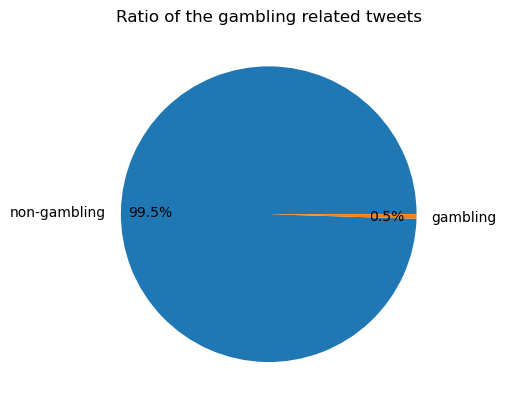

In [35]:
ax = twt_count_gam.plot.pie(y='value', labels=['non-gambling', 'gambling'], autopct='%1.1f%%', pctdistance=0.8)
ax.get_legend().remove()
plt.title('Ratio of the gambling related tweets')
plt.ylabel('')
plt.xlabel('')
plt.show()

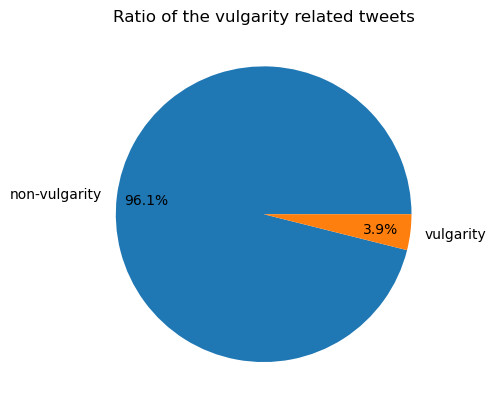

In [36]:
ax = twt_count_vul.plot.pie(y='value', labels=['non-vulgarity', 'vulgarity'], autopct='%1.1f%%', pctdistance=0.8)
ax.get_legend().remove()
plt.title('Ratio of the vulgarity related tweets')
plt.ylabel('')
plt.xlabel('')
plt.show()

In [37]:
gcc_count = pd.read_json('../file/gcc_count.json')
gcc_count = pd.json_normalize(gcc_count['rows'])
gcc_count['key'] = gcc_count['key'].astype(float)
gcc_count = gcc_count.drop([3,4])
gcc_count = gcc_count.groupby('key').sum().reset_index()

gcc_count

key    value
0 -1.0   430068
1  0.0   408755
2  1.0  2267528

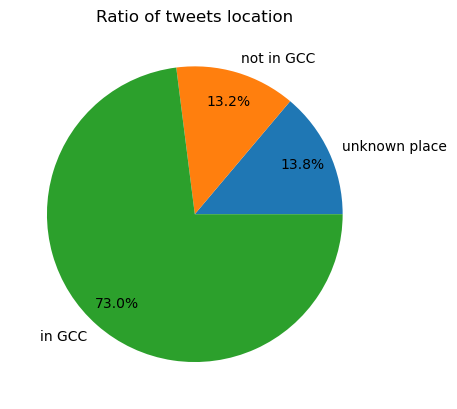

In [38]:
ax = gcc_count.plot.pie(y='value', labels=['unknown place', 'not in GCC', 'in GCC'], autopct='%1.1f%%', pctdistance=0.8)
ax.get_legend().remove()
plt.title('Ratio of tweets location')
plt.ylabel('')
plt.xlabel('')
plt.show()

In [39]:
vul_sen_area = pd.read_json('../file/vulgarity_sentiment_area.json')
vul_sen_area = pd.json_normalize(vul_sen_area['rows'])
vul_sen_area[['vul_cnt', 'sen', 'tot_cnt']] = vul_sen_area['value'].apply(pd.Series)
vul_sen_area = vul_sen_area.drop(['value'],axis=1)
vul_sen_area = vul_sen_area.drop(vul_sen_area[vul_sen_area['vul_cnt']==0].index)
vul_sen_area = vul_sen_area.rename(columns={'key': 'state'})
vul_sen_area = vul_sen_area.sort_values(by='state')
vul_sen_area

state  vul_cnt           sen   tot_cnt
0   australian capital territory   2305.0   5775.993841   70719.0
4                new south wales  38218.0  68955.050557  982917.0
5             northern territory    598.0   1634.651512   32882.0
6                     queensland  23987.0  36515.309548  558367.0
7                south australia   6816.0  12781.900814  198690.0
8                       tasmania   1890.0   4698.830296   73407.0
9                       victoria  36937.0  58221.471362  933539.0
11             western australia  10786.0  16899.962033  255976.0

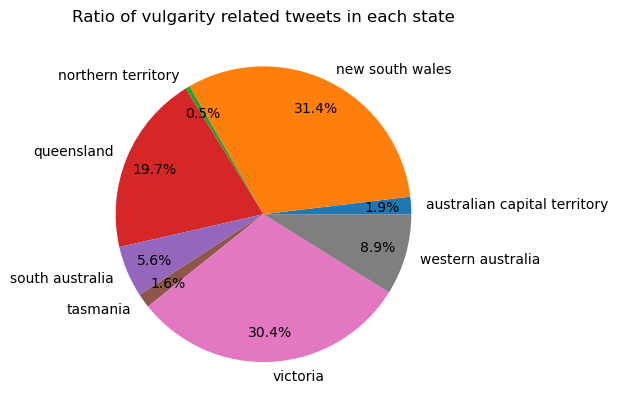

In [40]:
ax = vul_sen_area.plot.pie(y='vul_cnt', labels=vul_sen_area['state'], autopct='%1.1f%%', pctdistance=0.8)
ax.get_legend().remove()
plt.title('Ratio of vulgarity related tweets in each state')
plt.ylabel('')
plt.xlabel('')
plt.show()